Added **DropOut** to see if it improves accuracy.

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

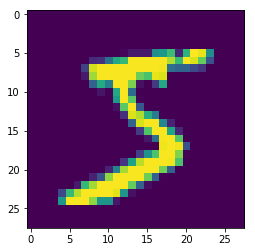

In [1]:
# https://keras.io/
!pip install -q keras
import keras   # This cell is used to import keras.
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add ,BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()  #The Keras deep learning library provides a convenience method for loading the MNIST dataset.
                                                           #load (downloaded if needed) the MNIST dataset.

print (X_train.shape)   # Print the shape of the input image.
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])   # Print the 1st input image
# For a multi-layer perceptron model we must reduce the images down into a vector of pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
# normalize input from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train[:10]
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train[:10]

In [6]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(BatchNormalization())
model.add(Dropout(0.10))
model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.10))
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(MaxPooling2D(pool_size=(2, 2))) # 11

model.add(Dropout(0.10))
model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Dropout(0.10))
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7
model.add(Dropout(0.10))

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Co

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_3 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 32)        4640      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [9]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.1776 - acc: 0.9441 - val_loss: 0.0462 - val_acc: 0.9857
Epoch 2/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0625 - acc: 0.9806 - val_loss: 0.0405 - val_acc: 0.9871
Epoch 3/10
60000/60000 [==============================] - 21s 344us/step - loss: 0.0501 - acc: 0.9841 - val_loss: 0.0428 - val_acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.0429 - acc: 0.9866 - val_loss: 0.0339 - val_acc: 0.9897
Epoch 5/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0387 - acc: 0.9879 - val_loss: 0.0296 - val_acc: 0.9905
Epoch 6/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.0345 - acc: 0.9888 - val_loss: 0.0287 - val_acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.0331 - acc: 0.9898 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [11]:
print(score)

[0.026362482538183393, 0.9917]


In [0]:
y_pred = model.predict(X_test)

In [13]:
print(y_pred[:9])
print(y_test[:9])

[[5.51447039e-12 5.72425544e-11 3.22212770e-07 1.12860342e-07
  1.04987060e-16 1.53557158e-12 1.01110376e-16 9.99999523e-01
  2.43562427e-11 1.15024967e-09]
 [4.08283078e-08 6.04843717e-06 9.99993443e-01 5.87197235e-11
  6.49394288e-11 3.79310472e-10 5.24899974e-07 2.80214350e-12
  1.03360946e-08 3.02107575e-11]
 [3.30377739e-11 9.99996066e-01 5.37361551e-08 3.29843637e-08
  1.67320039e-07 7.64291656e-07 1.50876112e-08 2.33383298e-06
  5.02851094e-07 1.23279902e-08]
 [9.99989986e-01 4.35458180e-12 2.51404568e-08 1.31622407e-10
  1.36546818e-09 9.10824554e-08 9.74952127e-06 1.13495808e-08
  1.19698001e-07 8.49097948e-09]
 [1.90674240e-10 1.02073419e-10 2.33860951e-11 2.00651242e-15
  9.99994636e-01 1.09692481e-11 9.99249208e-12 5.64478707e-11
  1.68353298e-09 5.34852052e-06]
 [8.10523610e-12 9.99998450e-01 1.63206071e-08 2.83363044e-09
  1.60432890e-07 5.31853566e-08 3.99327860e-09 1.11385111e-06
  1.90899783e-07 1.07643450e-08]
 [1.22508384e-12 3.74288447e-06 1.61140036e-07 1.88238036e

In [14]:
model.fit(X_train, Y_train, batch_size=64, 
          epochs=20, verbose=1, 
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0205 - acc: 0.9934 - val_loss: 0.0204 - val_acc: 0.9930
Epoch 2/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0182 - acc: 0.9940 - val_loss: 0.0233 - val_acc: 0.9925
Epoch 3/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0183 - acc: 0.9940 - val_loss: 0.0247 - val_acc: 0.9932
Epoch 4/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0188 - acc: 0.9935 - val_loss: 0.0216 - val_acc: 0.9935
Epoch 5/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.0181 - acc: 0.9939 - val_loss: 0.0261 - val_acc: 0.9916
Epoch 6/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.0164 - acc: 0.9947 - val_loss: 0.0206 - val_acc: 0.9938
Epoch 7/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.0175 - acc: 0.9941 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)